In [19]:
import pickle
import random
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
import matplotlib.pyplot as plt


In [20]:
def calculateBias(y_actual, y_pred):
    return np.mean(y_actual - y_pred)

def calculateVariance(y_actual, y_pred):
    return np.mean(((y_pred - y_actual) - np.mean(y_pred - y_actual)) ** 2)


def calculateMSE(y_actual, y_pred):
    return np.mean((y_actual - y_pred) ** 2)

# Task 3.1 Re-Sample data

In [21]:
with open('data.pickle', 'rb') as file:
    loaded_data = pickle.load(file)

random.shuffle(loaded_data['train'])

subset_size = len(loaded_data['train']) // 15

print(subset_size)

training_datasets = [loaded_data['train'][i:i+subset_size] for i in range(0, len(loaded_data['train']), subset_size)]

test  = loaded_data['test']
X_test = test[:, 0].reshape(-1, 1)
y_test = test[:, 1]

bias = []
variance = []
MSE = []
Irreducible = []
X = []
y = []

for i in range(len(training_datasets)):
    X.append(training_datasets[i][:, 0].reshape(-1, 1))
    y.append(training_datasets[i][:, 1])

750


# Task 3.2: Training Data

In [22]:

for degree in range(1,11):
    tempB = []
    tempV = []
    tempM = []
    for i in range(len(training_datasets)):

        model = LinearRegression()

        poly_features = PolynomialFeatures(degree=degree)
        X_poly = poly_features.fit_transform(X[i])
        X_poly_test = poly_features.transform(X_test)

        model.fit(X_poly, y[i])
        y_pred = model.predict(X_poly_test)

        bias_value = calculateBias(y_test,y_pred)
        tempB.append(bias_value**2)

        # print(np.var(y_pred - y_test))
        variance_value = calculateVariance(y_test,y_pred)
        # print(variance_value)
        tempV.append(variance_value)
        tempM.append(calculateMSE(y_test,y_pred))
            

    bias.append(np.mean(tempB))
    variance.append(np.mean(tempV))
    MSE.append(np.mean(tempM))
    print(f"Degree: {degree}, Bias: {bias[degree-1]}, Variance: {variance[degree - 1]}, and MSE: {MSE[degree - 1]}")

Degree: 1, Bias: 0.06938875839578562, Variance: 0.9663289418968425, and MSE: 1.035717700292628
Degree: 2, Bias: 0.05867591993892028, Variance: 0.9298078671137138, and MSE: 0.9884837870526342
Degree: 3, Bias: 0.023125371820019565, Variance: 0.1120177483320384, and MSE: 0.13514312015205793
Degree: 4, Bias: 0.022570825258851242, Variance: 0.15197590480886175, and MSE: 0.174546730067713
Degree: 5, Bias: 0.02358687950558068, Variance: 0.1696841073035188, and MSE: 0.19327098680909943
Degree: 6, Bias: 0.022569884446627296, Variance: 0.19408497897082158, and MSE: 0.21665486341744886
Degree: 7, Bias: 0.023221564032063262, Variance: 0.2123817349378018, and MSE: 0.2356032989698651
Degree: 8, Bias: 0.018446977617750455, Variance: 0.21337793237006872, and MSE: 0.23182490998781918
Degree: 9, Bias: 0.01436965649132386, Variance: 0.2467758569910456, and MSE: 0.26114551348236953
Degree: 10, Bias: 0.014112681693568824, Variance: 0.39351023035393806, and MSE: 0.4076229120475069


# Task 4: Calculating Irreducible Error

In [23]:
for degree in range(1,11):
    Irreducible.append(MSE[degree - 1] - bias[degree - 1] - variance[degree - 1])

print(Irreducible)

[0.0, 1.1102230246251565e-16, -2.7755575615628914e-17, 2.7755575615628914e-17, -5.551115123125783e-17, -2.7755575615628914e-17, 2.7755575615628914e-17, 0.0, 8.326672684688674e-17, 0.0]


# Task 5: Plotting

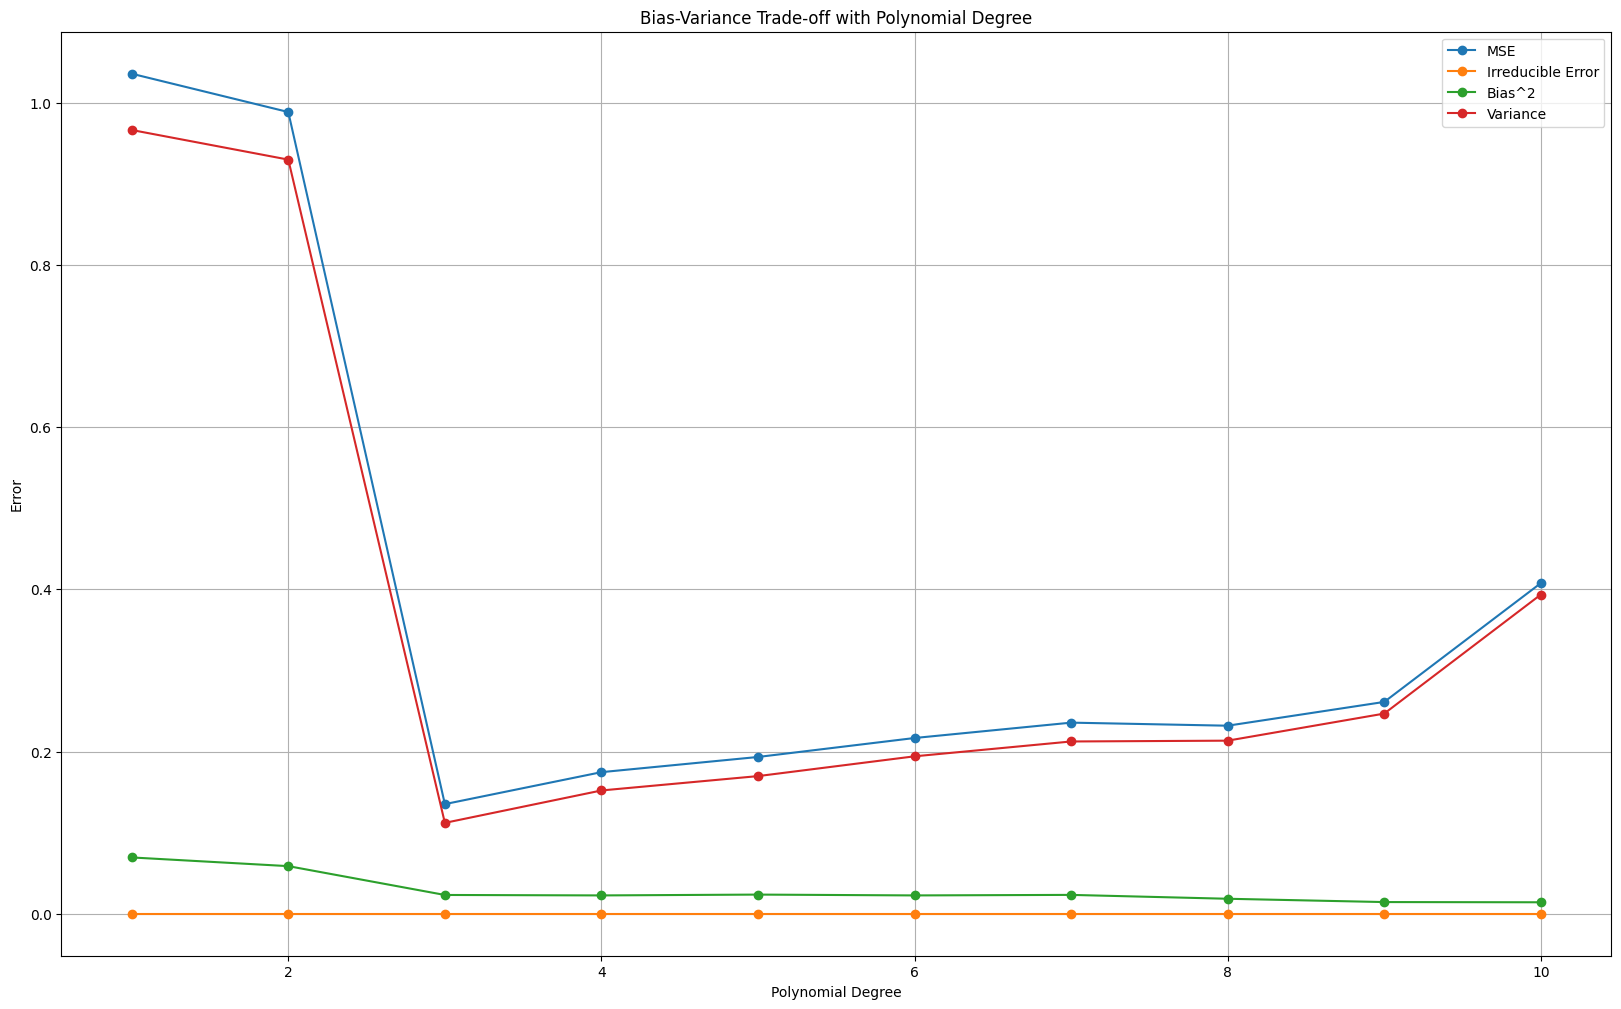

In [24]:
degrees = list(range(1, 11))
plt.figure(figsize=(20, 12))

plt.plot(degrees, MSE, label='MSE', marker='o')
plt.plot(degrees, Irreducible, label='Irreducible Error', marker='o')
plt.plot(degrees, bias, label='Bias^2', marker='o')
plt.plot(degrees, variance, label='Variance', marker='o')

plt.title('Bias-Variance Trade-off with Polynomial Degree')
plt.xlabel('Polynomial Degree')
plt.ylabel('Error')
plt.legend()
plt.grid(True)
plt.show()